<a href="https://colab.research.google.com/github/jfrchicanog/quantuma-course/blob/main/QUBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We first install the Ocean SDK (D-Wave software)

In [ ]:
!pip install dwave-ocean-sdk networkx

Now we need to configure the environment (press 'enter' to use the default options). If you have an API key to use D-Wave systems, you can enter the key at this stage.

In [ ]:
!dwave setup

Import the required libraries

In [ ]:
from dimod import Binary, ExactSolver
from networkx import Graph, draw
from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSampler
from dwave.system import DWaveSampler, EmbeddingComposite

This function creates the QUBO expression from the graph

In [ ]:
def obtener_QUBO(G):
  nvars = len(G.nodes())
  var = [Binary(f'v{i}') for i in range (0,nvars)]
  qubo = -sum([(var[i]-var[j])**2 for i,j in G.edges()])
  return qubo

We define a function to get the sampler, which will try to solve the problem

In [ ]:
def obtener_sampler():
  return ExactSolver()
  #return SimulatedAnnealingSampler()
  #return SteepestDescentSampler()
  #return EmbeddingComposite(DWaveSampler())

Let's use this simple graph

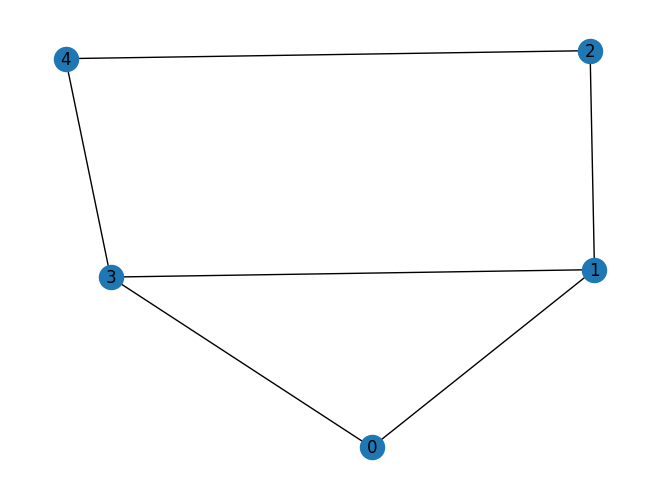

In [ ]:
G = Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)])
draw(G, with_labels=True)

We show the QUBO model for this graph:

In [ ]:
qubo = obtener_QUBO(G)
print(qubo)

BinaryQuadraticModel({'v0': -2.0, 'v1': -3.0, 'v3': -3.0, 'v2': -2.0, 'v4': -2.0}, {('v1', 'v0'): 2.0, ('v3', 'v0'): 2.0, ('v3', 'v1'): 2.0, ('v2', 'v1'): 2.0, ('v4', 'v3'): 2.0, ('v4', 'v2'): 2.0}, -0.0, 'BINARY')

We compute the solution using the sampler. This could be a Dwave quantum annealer if the API key was introduced during the setup stage of the SDK and the appropraite sampler was chosen.

In [ ]:
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads=10)
print(resultado)

  v0 v1 v2 v3 v4 energy num_oc. chain_.
0  0  1  0  0  1   -5.0       1     0.0
1  1  1  0  0  1   -5.0       1     0.0
2  1  0  1  1  0   -5.0       6     0.0
3  0  0  1  1  0   -5.0       2     0.0
['BINARY', 4 rows, 10 samples, 5 variables]


If you did not configure Dwave software above, you can always configure it using the following command.

In [ ]:
!dwave config create